In [1]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('bmh')

In [2]:
#load the data
df_btc= yf.Ticker('BTC-USD').history(start='2019-03-22',end='2022-10-03')
df_eth= yf.Ticker('ETH-USD').history(start='2019-03-22',end='2022-10-03')
df_ltc= yf.Ticker('LTC-USD').history(start='2019-03-22',end='2022-10-03')

In [3]:
df_btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-21,4083.953857,4097.359863,4005.151367,4029.326904,10831212662,0,0
2019-03-22,4028.514648,4053.906738,4021.542480,4023.968262,9252935969,0,0
2019-03-23,4022.713379,4049.882568,4015.964600,4035.826416,9578850549,0,0
2019-03-24,4035.163574,4040.699707,4006.192871,4022.168213,9144851065,0,0
2019-03-25,4024.112793,4038.840820,3934.031250,3963.070557,10359818883,0,0
...,...,...,...,...,...,...,...
2022-09-28,19104.621094,19688.343750,18553.296875,19426.720703,53071298734,0,0
2022-09-29,19427.779297,19589.265625,18924.353516,19573.050781,41037843771,0,0
2022-09-30,19573.431641,20109.849609,19265.662109,19431.789062,43975248085,0,0


In [4]:
#creating a new dataframe that holds the closing price of all 3 crypto currencies
df=pd.DataFrame({'BTC':df_btc['Close'],
                'ETH':df_eth['Close'],
                'LTC':df_ltc['Close']})

In [5]:
df

,BTC,ETH,LTC
Date,,,
2019-03-21,4029.326904,136.636063,59.378326
2019-03-22,4023.968262,137.181442,59.824001
2019-03-23,4035.826416,138.239868,61.348614
2019-03-24,4022.168213,136.986923,60.223877
2019-03-25,3963.070557,135.031021,59.496738
...,...,...,...
2022-09-28,19426.720703,1337.410889,53.308426
2022-09-29,19573.050781,1335.652344,53.914047
2022-09-30,19431.789062,1327.978638,53.397038


In [6]:
#Get Statistics on the data
df.describe()

,BTC,ETH,LTC
count,1292.000000,1292.000000,1292.000000
mean,25118.292274,1386.254938,103.731471
std,17884.964316,1327.898581,62.279115
min,3963.070557,110.605873,30.930883
25%,9321.424072,217.123024,55.160295
50%,19304.867188,657.054932,78.592632
75%,40530.025391,2457.121094,140.881973
max,67566.828125,4812.087402,386.450775


BTC
ETH
LTC


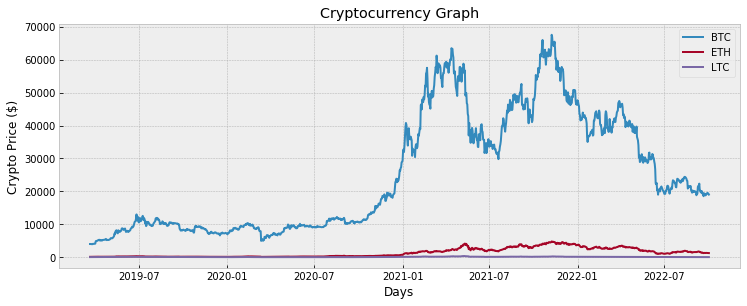

In [7]:
#Visualize the
plt.figure(figsize=(12.2,4.5))
for c in df.columns.values:
    print(c)
    plt.plot(df[c],label=c)
plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(df.columns.values,loc='best')
plt.show()

In [8]:
#Scale the data
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,100))
scaled=min_max_scaler.fit_transform(df)
scaled

array([[ 0.10417049,  0.5536593 ,  8.00164595],
       [ 0.09574545,  0.56525946,  8.12700459],
       [ 0.11438925,  0.58777206,  8.55584485],
       ...,
       [24.32044756, 25.8933861 ,  6.31923969],
       [24.13226157, 25.54595883,  6.18136568],
       [23.71092124, 24.78979499,  5.90142763]])

In [9]:
scaled=pd.DataFrame(scaled,columns=df.columns)
scaled

,BTC,ETH,LTC
0,0.104170,0.553659,8.001646
1,0.095745,0.565259,8.127005
2,0.114389,0.587772,8.555845
3,0.092915,0.561122,8.239481
4,0.000000,0.519520,8.034953
...,...,...,...
1287,24.312479,26.094009,6.294315
1288,24.542544,26.056605,6.464663
1289,24.320448,25.893386,6.319240
1290,24.132262,25.545959,6.181366


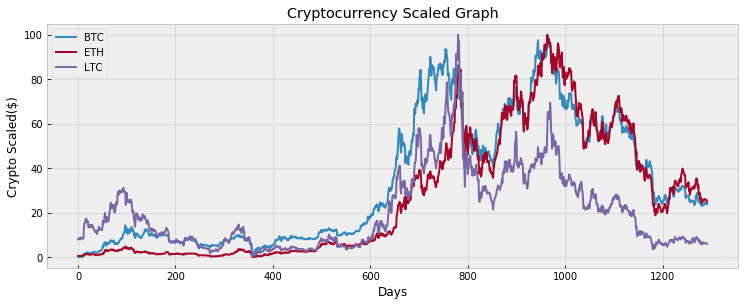

In [10]:
#Convert the scaled dat
my_crypto=scaled
plt.figure(figsize=(12.4,4.5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c)
plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled($)')
plt.legend(my_crypto.columns.values,loc='upper left')
plt.show()

In [11]:
#Get The daily simple return
DSR=df.pct_change(1)
DSR#daily simple return

,BTC,ETH,LTC
Date,,,
2019-03-21,NaN,NaN,NaN
2019-03-22,-0.001330,0.003991,0.007506
2019-03-23,0.002947,0.007716,0.025485
2019-03-24,-0.003384,-0.009064,-0.018334
2019-03-25,-0.014693,-0.014278,-0.012074
...,...,...,...
2022-09-28,0.016544,0.005476,0.010830
2022-09-29,0.007532,-0.001315,0.011361
2022-09-30,-0.007217,-0.005745,-0.009590


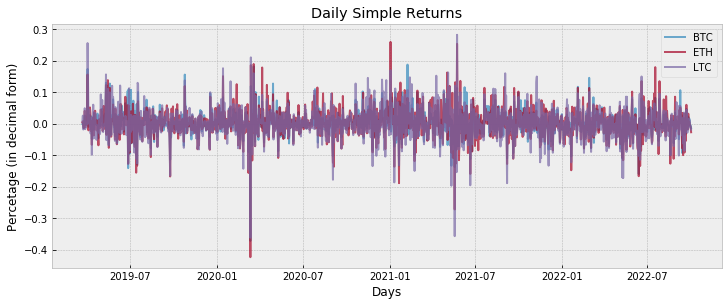

In [12]:
#visualize the daily simple return
plt.figure(figsize=(12,4.5))
for c in DSR.columns.values:
    plt.plot(np.array(DSR.index),DSR[c].values,label=c,lw=2,alpha=.7)
    
plt.title('Daily Simple Returns')
plt.ylabel('Percetage (in decimal form)')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc='best')
plt.show()

In [13]:
#Get the volatility
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


BTC    0.038638
ETH    0.049073
LTC    0.051870
dtype: float64

In [14]:
#show the mean/average daily simple return
DSR.mean()

BTC    0.001964
ETH    0.002965
LTC    0.001270
dtype: float64

In [15]:
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.813775,0.790132
ETH,0.813775,1.000000,0.821682
LTC,0.790132,0.821682,1.000000


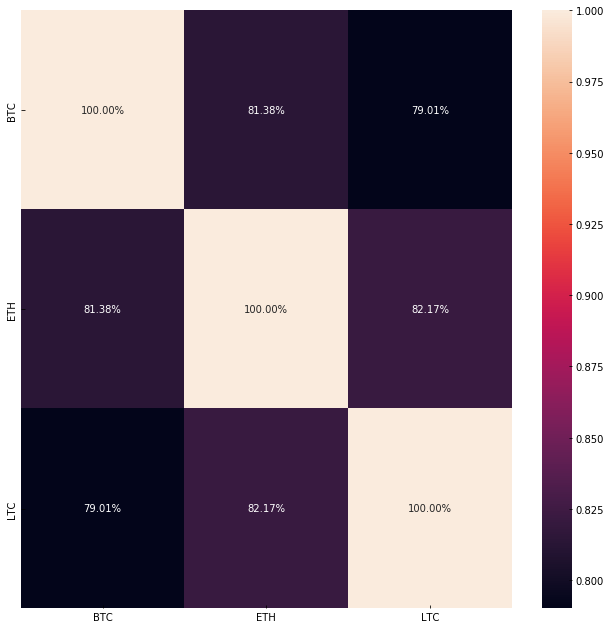

In [16]:
#Visualize the correlation
import seaborn as sns
plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(),annot=True,fmt='.2%')

In [17]:
#Get the daily cumulative simple returns
DCSR=(DSR+1).cumprod()
DCSR

,BTC,ETH,LTC
Date,,,
2019-03-21,NaN,NaN,NaN
2019-03-22,0.998670,1.003991,1.007506
2019-03-23,1.001613,1.011738,1.033182
2019-03-24,0.998223,1.002568,1.014240
2019-03-25,0.983556,0.988253,1.001994
...,...,...,...
2022-09-28,4.821331,9.788125,0.897776
2022-09-29,4.857648,9.775255,0.907975
2022-09-30,4.822589,9.719093,0.899268


In [18]:
1-0.001330+0.002947

1.001617

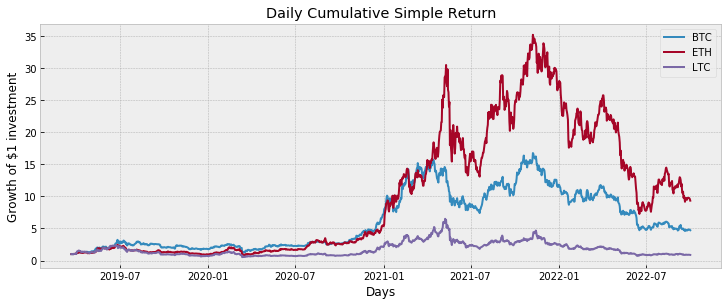

In [19]:
#visualize the cumulative simple returns
plt.figure(figsize=(12.2,4.5))
for c in DCSR.columns.values:
    plt.plot(np.array(DCSR.index),DCSR[c].values,lw=2,label=c)
plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values,loc='best',fontsize=10)
plt.show()

In [20]:
#if we invested a dollar a year ago 3 of these assets,100th day after that 1 dollar investment in bitcoin would have been 3 dollars
